In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
from operator import  itemgetter
plt.style.use("ggplot")

from sklearn.model_selection import  train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
# https://ailab.criteo.com/criteo-uplift-prediction-dataset/
source_df = pd.read_csv("criteo-uplift.csv.gz")
source_df.head(10)

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,treatment,conversion,visit,exposure
0,1.991981,3.263641,9.241052,3.735871,3.506733,10.161281,2.981721,-0.166689,-0.584392,9.850093,-1.8609,4.157648,1,0,0,0
1,1.991981,3.263641,9.274430,3.735871,3.506733,10.161281,2.981721,-0.166689,-0.584392,9.850093,-1.8609,4.157648,1,0,0,0
2,1.991981,3.263641,9.226241,3.735871,3.506733,10.161281,2.981721,-0.166689,-0.584392,9.850093,-1.8609,4.157648,1,0,0,0
3,1.991981,3.263641,9.274572,3.735871,3.506733,10.161281,2.981721,-0.166689,-0.584392,9.850093,-1.8609,4.157648,1,0,0,0
4,1.991981,3.263641,9.332619,3.735871,3.506733,10.161281,2.981721,-0.166689,-0.584392,9.850093,-1.8609,4.157648,0,0,0,0
5,1.991981,3.263641,9.319308,3.735871,3.506733,10.161281,2.981721,-0.166689,-0.584392,9.850093,-1.8609,4.157648,1,0,0,0
6,1.991981,3.263641,9.274632,3.735871,3.506733,10.161281,2.981721,-0.166689,-0.584392,9.850093,-1.8609,4.157648,0,0,0,0
7,1.991981,3.263641,9.149639,3.735871,3.506733,10.161281,2.981721,-0.166689,-0.584392,9.850093,-1.8609,4.157648,1,0,0,0
8,1.991981,3.263641,9.226277,3.735871,3.506733,10.161281,2.981721,-0.166689,-0.584392,9.850093,-1.8609,4.157648,0,0,0,0
9,1.991981,3.263641,8.995635,3.735871,3.506733,10.161281,2.981721,-0.166689,-0.584392,9.850093,-1.8609,4.157648,1,0,0,0


In [28]:
source_df.describe()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,treatment,conversion,visit,exposure
count,2.530948e+07,2.530948e+07,2.530948e+07,2.530948e+07,2.530948e+07,2.530948e+07,2.530948e+07,2.530948e+07,2.530948e+07,2.530948e+07,2.530948e+07,2.530948e+07,2.530948e+07,2.530948e+07,2.530948e+07,2.530948e+07
mean,6.193441e-01,3.265647e+00,8.506897e+00,3.656395e+00,3.522577e+00,1.020163e+01,1.755059e+00,-2.934498e-01,-2.049940e+00,1.067117e+01,-2.092319e+00,4.159096e+00,8.458817e-01,2.294041e-03,4.132159e-02,3.493936e-02
std,1.534830e+00,2.293420e-02,3.589551e-01,2.415026e-01,1.090087e-01,2.322288e-01,1.673734e+00,6.648472e-01,5.466541e+00,2.294696e+00,1.382599e+00,1.700285e-02,3.610621e-01,4.784118e-02,1.990330e-01,1.836262e-01
min,-1.946282e+00,3.263641e+00,8.272483e+00,1.119173e+00,3.506733e+00,1.016128e+01,-8.958192e+00,-4.724865e+00,-3.350365e+01,9.850093e+00,-1.303824e+01,4.157648e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,-1.005456e+00,3.263641e+00,8.272483e+00,3.735871e+00,3.506733e+00,1.016128e+01,9.451627e-01,-1.666894e-01,-2.716012e+00,9.850093e+00,-1.860900e+00,4.157648e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.631905e+00,3.263641e+00,8.272483e+00,3.735871e+00,3.506733e+00,1.016128e+01,2.386066e+00,-1.666894e-01,1.107571e+00,9.850093e+00,-1.860900e+00,4.157648e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.991981e+00,3.263641e+00,8.756008e+00,3.735871e+00,3.506733e+00,1.016128e+01,2.981721e+00,-1.666894e-01,1.107571e+00,9.850093e+00,-1.860900e+00,4.157648e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.991981e+00,4.827224e+00,9.337056e+00,3.735871e+00,7.797549e+00,1.846414e+01,2.981721e+00,-1.666894e-01,1.107571e+00,3.198858e+01,-1.860900e+00,5.293435e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


# EDA

In [49]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 5]

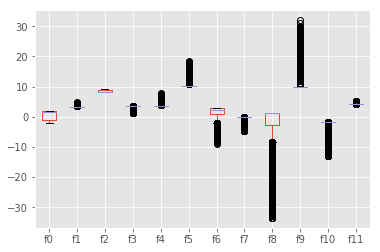

In [33]:
source_df.boxplot(column=['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11'])

(array([ 2990327.,  2496006.,  2161683.,  1695964.,   727439.,   507490.,
          545368.,   562566.,   854168., 12768471.]),
 array([-1.94628211, -1.55245583, -1.15862956, -0.76480329, -0.37097702,
         0.02284926,  0.41667553,  0.8105018 ,  1.20432808,  1.59815435,
         1.99198062]),
 <a list of 10 Patch objects>)

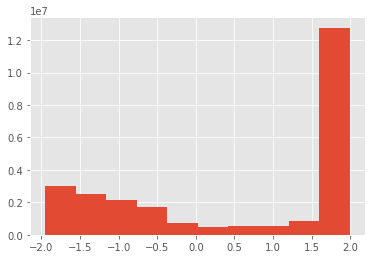

In [34]:
plt.hist(source_df["f0"])

(array([2.5240788e+07, 3.8131000e+04, 2.0003000e+04, 7.7110000e+03,
        1.9190000e+03, 6.7900000e+02, 1.9200000e+02, 4.4000000e+01,
        1.4000000e+01, 1.0000000e+00]),
 array([3.26364064, 3.41999897, 3.57635731, 3.73271564, 3.88907398,
        4.04543232, 4.20179065, 4.35814899, 4.51450733, 4.67086566,
        4.827224  ]),
 <a list of 10 Patch objects>)

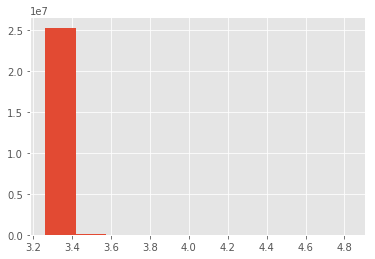

In [35]:
plt.hist(source_df["f1"])

(array([16459974.,   797366.,   634072.,   685546.,   765934.,   924188.,
          867753.,  1135327.,  1376101.,  1663221.]),
 array([8.2724831 , 8.37894038, 8.48539766, 8.59185494, 8.69831223,
        8.80476951, 8.91122679, 9.01768407, 9.12414135, 9.23059863,
        9.33705592]),
 <a list of 10 Patch objects>)

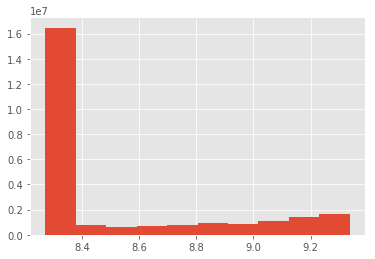

In [36]:
plt.hist(source_df["f2"])

(array([9.0000000e+00, 1.3400000e+02, 6.0140000e+03, 4.2136000e+04,
        1.3040300e+05, 2.6957500e+05, 4.7763200e+05, 7.3266900e+05,
        1.1596120e+06, 2.2491298e+07]),
 array([1.11917327, 1.38084303, 1.6425128 , 1.90418257, 2.16585234,
        2.4275221 , 2.68919187, 2.95086164, 3.21253141, 3.47420117,
        3.73587094]),
 <a list of 10 Patch objects>)

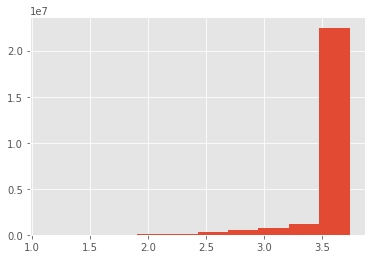

In [37]:
plt.hist(source_df["f3"])

(array([2.4995996e+07, 2.1610700e+05, 5.7161000e+04, 2.4481000e+04,
        1.0497000e+04, 3.6970000e+03, 1.1680000e+03, 2.9700000e+02,
        6.6000000e+01, 1.2000000e+01]),
 array([3.50673313, 3.93581476, 4.36489639, 4.79397802, 5.22305964,
        5.65214127, 6.0812229 , 6.51030453, 6.93938616, 7.36846778,
        7.79754941]),
 <a list of 10 Patch objects>)

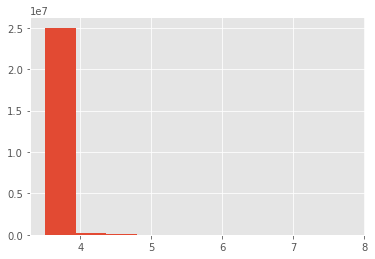

In [38]:
plt.hist(source_df["f4"])

(array([2.4953526e+07, 2.4411500e+05, 7.1598000e+04, 2.8783000e+04,
        7.8530000e+03, 2.6980000e+03, 6.8900000e+02, 1.6300000e+02,
        5.1000000e+01, 6.0000000e+00]),
 array([10.16128065, 10.99156695, 11.82185325, 12.65213955, 13.48242585,
        14.31271214, 15.14299844, 15.97328474, 16.80357104, 17.63385734,
        18.46414364]),
 <a list of 10 Patch objects>)

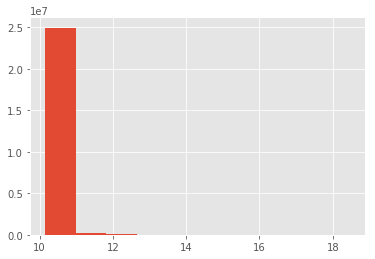

In [39]:
plt.hist(source_df["f5"])

(array([2.300000e+01, 5.900000e+02, 1.895600e+04, 1.081490e+05,
        3.439910e+05, 8.885900e+05, 1.589303e+06, 2.243980e+06,
        3.771620e+06, 1.634428e+07]),
 array([-8.95819158, -7.76420033, -6.57020909, -5.37621784, -4.18222659,
        -2.98823535, -1.7942441 , -0.60025285,  0.59373839,  1.78772964,
         2.98172089]),
 <a list of 10 Patch objects>)

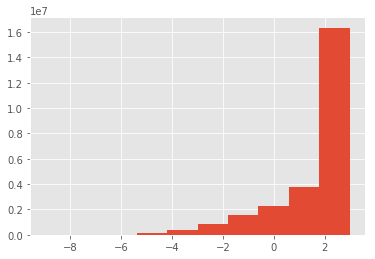

In [40]:
plt.hist(source_df["f6"])

(array([  255549.,   204609.,   166644.,    99088.,    69622.,    51522.,
           50050.,    41778.,    40566., 24330054.]),
 array([-4.72486484, -4.26904729, -3.81322974, -3.35741219, -2.90159465,
        -2.4457771 , -1.98995955, -1.534142  , -1.07832445, -0.62250691,
        -0.16668936]),
 <a list of 10 Patch objects>)

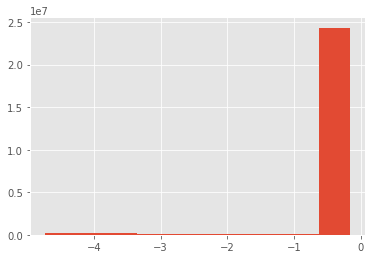

In [41]:
plt.hist(source_df["f7"])

(array([7.1600000e+02, 1.6453000e+04, 9.0938000e+04, 2.8551600e+05,
        5.7849500e+05, 8.8960200e+05, 1.1967930e+06, 1.6069330e+06,
        2.4034420e+06, 1.8240594e+07]),
 array([-33.50365454, -30.042532  , -26.58140945, -23.1202869 ,
        -19.65916436, -16.19804181, -12.73691926,  -9.27579672,
         -5.81467417,  -2.35355162,   1.10757092]),
 <a list of 10 Patch objects>)

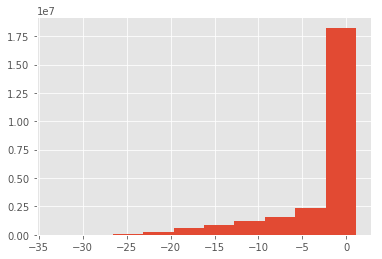

In [42]:
plt.hist(source_df["f8"])

(array([2.2276719e+07, 9.9926900e+05, 7.9470100e+05, 6.0982500e+05,
        3.9374600e+05, 1.7885000e+05, 4.9497000e+04, 6.5700000e+03,
        3.0000000e+02, 5.0000000e+00]),
 array([ 9.85009345, 12.06394209, 14.27779073, 16.49163936, 18.705488  ,
        20.91933664, 23.13318528, 25.34703391, 27.56088255, 29.77473119,
        31.98857982]),
 <a list of 10 Patch objects>)

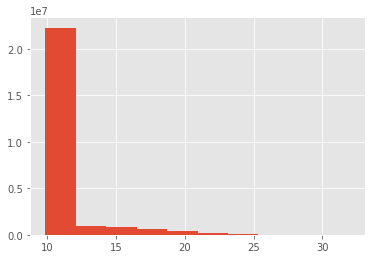

In [43]:
plt.hist(source_df["f9"])

(array([  160389.,   145272.,   111455.,    86720.,    78867.,    65712.,
           50593.,    41061.,    35089., 24534324.]),
 array([-13.03823866, -11.92050479, -10.80277092,  -9.68503704,
         -8.56730317,  -7.4495693 ,  -6.33183543,  -5.21410156,
         -4.09636769,  -2.97863382,  -1.86089995]),
 <a list of 10 Patch objects>)

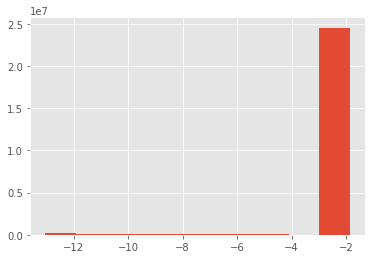

In [44]:
plt.hist(source_df["f10"])

(array([2.5224345e+07, 5.3345000e+04, 1.7588000e+04, 9.1930000e+03,
        3.4690000e+03, 1.0530000e+03, 3.4000000e+02, 1.0600000e+02,
        3.5000000e+01, 8.0000000e+00]),
 array([4.15764805, 4.2712267 , 4.38480536, 4.49838402, 4.61196268,
        4.72554133, 4.83911999, 4.95269865, 5.06627731, 5.17985596,
        5.29343462]),
 <a list of 10 Patch objects>)

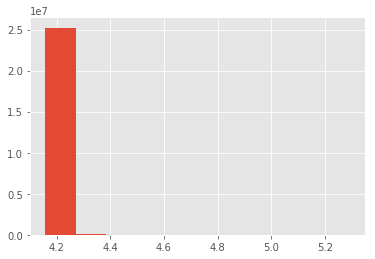

In [45]:
plt.hist(source_df["f11"])

In [46]:
cor_mat = source_df.corr()

In [47]:
from string import ascii_letters

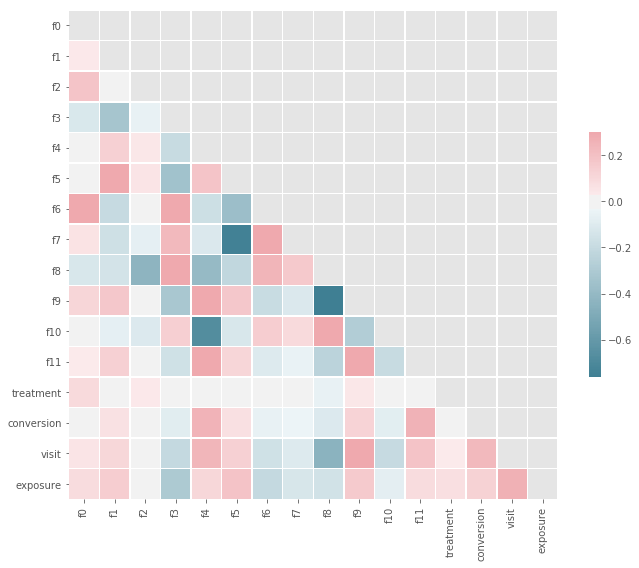

In [50]:
# Generate a mask for the upper triangle
mask = np.zeros_like(cor_mat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(cor_mat, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [51]:
source_df.dtypes

f0            float64
f1            float64
f2            float64
f3            float64
f4            float64
f5            float64
f6            float64
f7            float64
f8            float64
f9            float64
f10           float64
f11           float64
treatment       int64
conversion      int64
visit           int64
exposure        int64
dtype: object

In [3]:
feature_vector_df = source_df.drop(["treatment","conversion","visit","exposure"],axis=1)

In [5]:
feature_vector_df.head(10)

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11
0,1.991981,3.263641,9.241052,3.735871,3.506733,10.161281,2.981721,-0.166689,-0.584392,9.850093,-1.8609,4.157648
1,1.991981,3.263641,9.274430,3.735871,3.506733,10.161281,2.981721,-0.166689,-0.584392,9.850093,-1.8609,4.157648
2,1.991981,3.263641,9.226241,3.735871,3.506733,10.161281,2.981721,-0.166689,-0.584392,9.850093,-1.8609,4.157648
3,1.991981,3.263641,9.274572,3.735871,3.506733,10.161281,2.981721,-0.166689,-0.584392,9.850093,-1.8609,4.157648
4,1.991981,3.263641,9.332619,3.735871,3.506733,10.161281,2.981721,-0.166689,-0.584392,9.850093,-1.8609,4.157648
5,1.991981,3.263641,9.319308,3.735871,3.506733,10.161281,2.981721,-0.166689,-0.584392,9.850093,-1.8609,4.157648
6,1.991981,3.263641,9.274632,3.735871,3.506733,10.161281,2.981721,-0.166689,-0.584392,9.850093,-1.8609,4.157648
7,1.991981,3.263641,9.149639,3.735871,3.506733,10.161281,2.981721,-0.166689,-0.584392,9.850093,-1.8609,4.157648
8,1.991981,3.263641,9.226277,3.735871,3.506733,10.161281,2.981721,-0.166689,-0.584392,9.850093,-1.8609,4.157648
9,1.991981,3.263641,8.995635,3.735871,3.506733,10.161281,2.981721,-0.166689,-0.584392,9.850093,-1.8609,4.157648


In [37]:
is_treat_list = list(source_df["treatment"] == 1)
is_cv_list = list(source_df["conversion"] == 1)

In [38]:
train_is_cv_list, test_is_cv_list, train_is_treat_list, \
        test_is_treat_list, train_feature_vector_df,\
        test_feature_vector_df = train_test_split(is_cv_list, is_treat_list,
                                                                                feature_vector_df,
                                                                                train_size=0.5,
                                                                                test_size=0.5,
                                                                                random_state=42)

In [39]:
treat_model = LogisticRegression(C=0.01)
control_model = LogisticRegression(C=0.01)

train_sample_num = len(train_is_cv_list)

treat_is_cv_list = [train_is_cv_list[i] for i in range(train_sample_num) if train_is_treat_list[i] == True]
treat_feature_vector_list = train_feature_vector_df[train_is_treat_list]

control_is_cv_list = [train_is_cv_list[i] for i in range(train_sample_num) if train_is_treat_list[i] == False]
control_feature_vector_list = train_feature_vector_df[list(map(lambda a:a == False ,train_is_treat_list))]

In [43]:
treat_model.fit(treat_feature_vector_list, treat_is_cv_list)
control_model.fit(control_feature_vector_list, control_is_cv_list)

/Users/Sakaue/anaconda/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Sakaue/anaconda/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [44]:
treat_score = treat_model.predict_proba(test_feature_vector_df)
control_score = control_model.predict_proba(test_feature_vector_df)
score_list = treat_score[:,1] / control_score[:,1]

result = list(zip(test_is_cv_list, test_is_treat_list, score_list))
result.sort(key=itemgetter(2),reverse=True)
    

treat_uu = 0
control_uu = 0
treat_cv = 0
control_cv = 0
treat_cvr = 0.0
control_cvr = 0.0
lift = 0.0

stat_data = []

for is_cv, is_treat, score in result:
    if is_treat:
        treat_uu += 1
        if is_cv:
            treat_cv += 1
        treat_cvr = treat_cv / treat_uu
    else:
        control_uu += 1
        if is_cv:
            control_cv += 1
        control_cvr = control_cv / control_uu

    # コンバージョンレートの差に実験群の人数を掛けることでliftを算出
    lift = (treat_cvr - control_cvr) * treat_uu

    stat_data.append([is_cv, is_treat, score, treat_uu, control_uu, treat_cv, control_cv, treat_cvr, control_cvr, lift])

Text(0, 0.5, 'conversion rate')

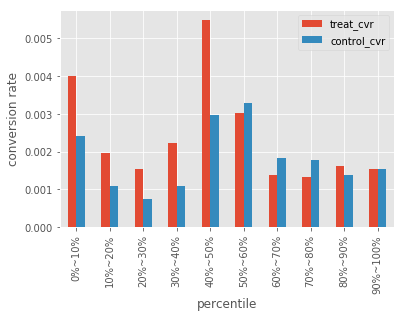

In [46]:
qdf = pd.DataFrame(columns=('treat_cvr', 'control_cvr'))

quantile_data = []
for n in range(10):
    start = int(n * len(result) / 10)
    end = int((n + 1) * len(result) / 10) - 1
    quantiled_result = result[start:end]
    
    treat_uu = list(map(lambda item:item[1], quantiled_result)).count(True)
    control_uu = list(map(lambda item:item[1], quantiled_result)).count(False)
    
    treat_cv = [item[0] for item in quantiled_result if item[1] == True].count(True)
    control_cv = [item[0] for item in quantiled_result if item[1] == False].count(True)
    
    treat_cvr = treat_cv / treat_uu
    control_cvr = control_cv / control_uu
    
    
    quantile_data.append([treat_uu, control_uu, treat_cv, control_cv, treat_cvr, control_cvr])
        
    label = "{}%~{}%".format(n*10, (n+1)*10)
    qdf.loc[label] = [treat_cvr, control_cvr]

qdf.plot.bar()
plt.xlabel("percentile")
plt.ylabel("conversion rate")

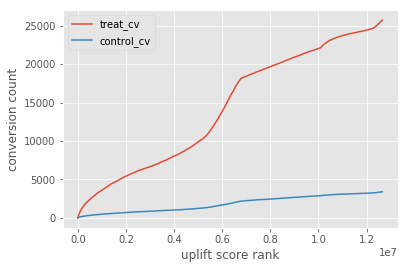

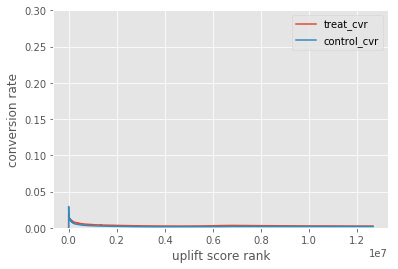

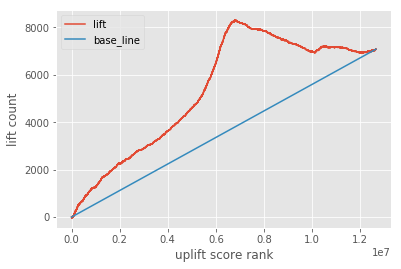

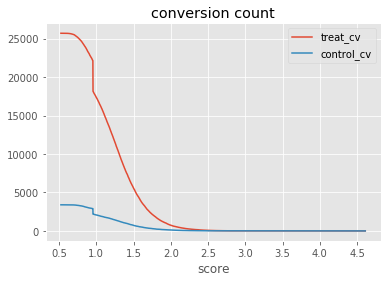

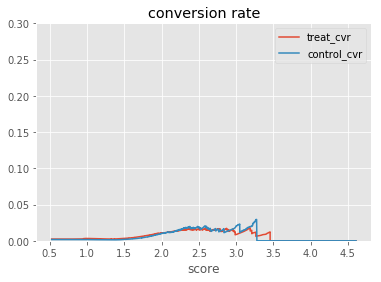

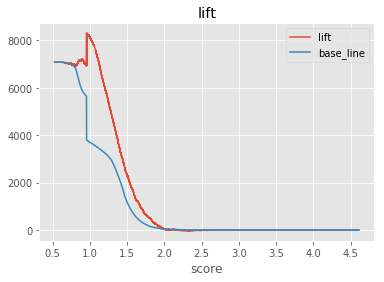

In [47]:
df = pd.DataFrame(stat_data)
df.columns = ["is_cv", "is_treat", "score", "treat_uu", "control_uu", "treat_cv", "control_cv", "treat_cvr", "control_cvr", "lift"]


# ベースラインを書き加える
df["base_line"] = df.index * df["lift"][len(df.index) - 1] / len(df.index)

df.plot(y=["treat_cv", "control_cv"])
plt.xlabel("uplift score rank")
plt.ylabel("conversion count")

df.plot(y=["treat_cvr", "control_cvr"], ylim=[0, 0.04])
plt.xlabel("uplift score rank")
plt.ylabel("conversion rate")

df.plot(y=["lift", "base_line"])
plt.xlabel("uplift score rank")
plt.ylabel("lift count")

df.plot(y=["treat_cv", "control_cv"], x="score", title="conversion count")
df.plot(y=["treat_cvr", "control_cvr"], ylim=[0, 0.04], x="score", title="conversion rate")
df.plot(y=["lift", "base_line"], x="score", title="lift")

In [48]:
auuc = (df["lift"] - df["base_line"]).sum() / len(df["lift"])
print("AUUC:", auuc)

AUUC: 1764.7708083957439


Text(0, 0.5, 'conversion rate')

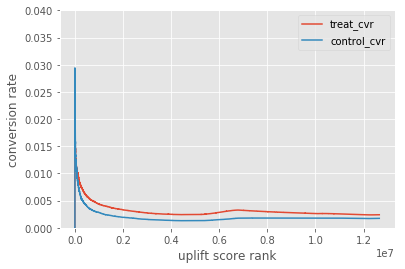

In [51]:
df.plot(y=["treat_cvr", "control_cvr"], ylim=[0, 0.04])
plt.xlabel("uplift score rank")
plt.ylabel("conversion rate")

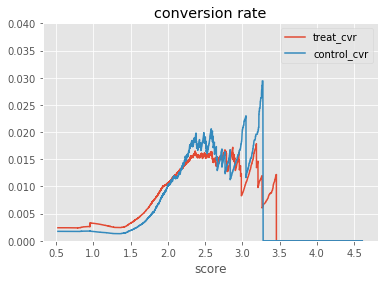

In [52]:
df.plot(y=["treat_cvr", "control_cvr"], ylim=[0, 0.04], x="score", title="conversion rate")